# Data Visualization

### Setting-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%run data_cleaning.ipynb

In [2]:
nyc = df1
sao = df2


In [3]:
swiss_air_nyc = nyc.loc[nyc["in_airline_company"] != "Lufthansa"]
lufthansa_air_nyc = nyc.loc[nyc["in_airline_company"] == "Lufthansa"]

In [4]:
swiss_air_sao = sao.loc[sao["in_airline_company"] != "Lufthansa"]
lufthansa_air_sao = sao.loc[sao["in_airline_company"] == "Lufthansa"]

in_airline_company and out_airline_company have the same values for a given row.
To describe either in_airline_company or out_air_line company is the same. This gave us:
* the count (the lenght of the dataframe rows),
* number of unique values (2: Swiss or Lufthansa), 
* the top (the unique value which is the most frequent in the dataframe) and 
* the frequency (which is the number of frequecy of the top).

In [5]:
nyc["in_airline_company"].describe()

count       189
unique        2
top       Swiss
freq        125
Name: in_airline_company, dtype: object

In [6]:
sao["in_airline_company"].describe()

count           179
unique            2
top       Lufthansa
freq             92
Name: in_airline_company, dtype: object

In [7]:
nyc["ticket_price"].describe()

count     189.000000
mean      995.623757
std       153.880632
min       678.720000
25%       911.380000
50%      1071.160000
75%      1074.280000
max      1198.390000
Name: ticket_price, dtype: float64

In [8]:
swiss_air_nyc["ticket_price"].describe()

count     125.000000
mean      926.983840
std       136.874582
min       678.720000
25%       786.880000
50%       933.720000
75%      1074.280000
max      1074.280000
Name: ticket_price, dtype: float64

In [9]:
lufthansa_air_nyc["ticket_price"].describe()

count      64.000000
mean     1129.686094
std        78.620935
min       923.390000
25%      1073.390000
50%      1176.010000
75%      1196.160000
max      1198.390000
Name: ticket_price, dtype: float64

In [10]:
swiss_air_sao["ticket_price"].describe()

count      87.000000
mean     1914.450345
std       131.071900
min      1799.680000
25%      1799.680000
50%      1799.720000
75%      2094.420000
max      2120.290000
Name: ticket_price, dtype: float64

In [11]:
lufthansa_air_sao["ticket_price"].describe()

count      92.000000
mean     1942.116304
std       132.255843
min      1817.900000
25%      1817.900000
50%      1948.600000
75%      1948.600000
max      2215.750000
Name: ticket_price, dtype: float64

## Line Plot

1. Line plots for NYC destination

In [12]:
cur_time = datetime.datetime.now()
month = cur_time.strftime('%b')

def plot_df(df, month = month):
    test = df.groupby(['day_scrap', 'hour_scrap'])['ticket_price'].agg(['min', 'mean', 'max'])
    test = test.reset_index()
    test['date'] = pd.to_datetime(test['day_scrap'].astype(str) + ' ' + month + ' ' + test['hour_scrap'].astype(str), format='%d %b %H')
    plt.fill_between(test['date'], test['min'], test['max'], alpha=0.3)
    plt.xticks(rotation=90)
    plt.plot(test['date'], test['mean'])
    # plt.ylim(700, 1300)
    # plt.yticks(range(700, 1300, 50))

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %I %p'))

    plt.show()

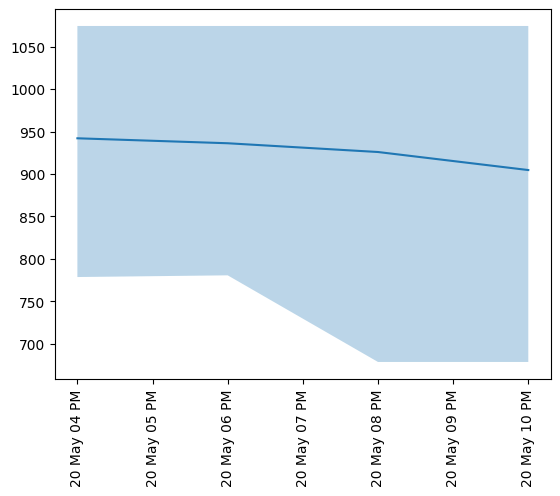

In [13]:
plot_df(df = swiss_air_nyc)

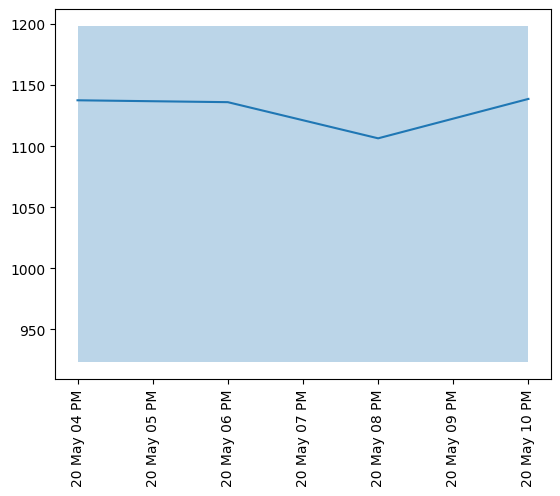

In [14]:
plot_df(df = lufthansa_air_nyc)

2. Line plot for São Paulo destination

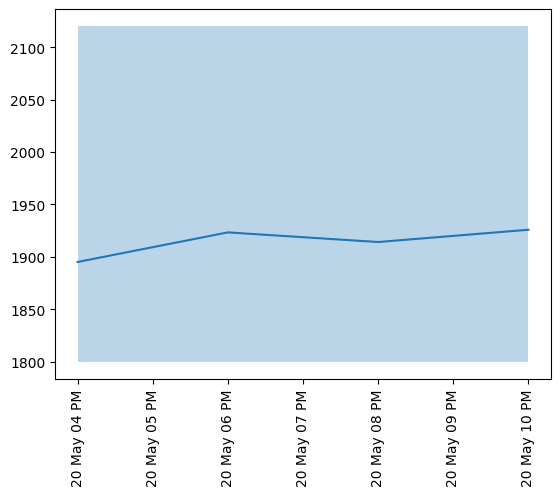

In [15]:
plot_df(df = swiss_air_sao)

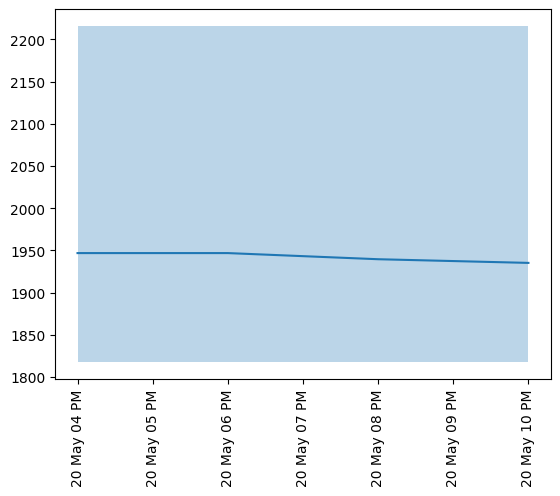

In [16]:
plot_df(df = lufthansa_air_sao)